In [1]:
import numpy as np
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
n = 20
σ = 10   # spread of storm
γ = 0.95 # Discount Factor
x_eye = np.array([14,15])

x_goal = np.array([19,9])

grid = np.zeros((n, n))

ω = lambda x:  np.exp(-np.linalg.norm(np.array(x) - x_eye, 2)**2 / (2*σ**2))
ω_grid = grid
for i in range(grid.shape[0]):
    for j in range(grid.shape[1]):
        ω_grid[j, i]  = ω([i, j])
ω_grid = ω_grid.T # the indices need to be transposed because moving to the right is actually moving through columns

Text(0.5, 1.0, 'Storm Influence')

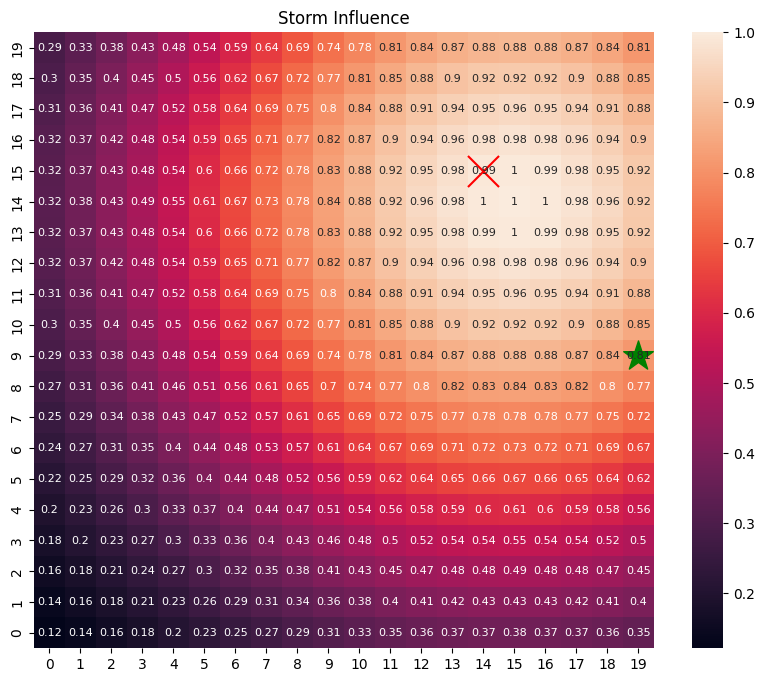

In [17]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(ω_grid, annot=True, annot_kws={'fontsize':8}, ax=ax)
ax.scatter(x_goal[0]+0.5,x_goal[1]+0.5,s=500,c='g', marker='*', label='Goal')
ax.scatter(x_eye[0]+0.5,x_eye[1]+0.5,s=500,c='r', marker='x', label='Storm Eye')
ax.invert_yaxis()
ax.set_title('Storm Influence')
# ax.legend()

In [18]:
# define actions
act = {
    0: np.array([0, 1]),    #  up
    1: np.array([1, 0]),    #  right
    2: np.array([0, -1]),   #  down
    3: np.array([-1, 0])    #  left
}

# define dynamic rule for each step
def dynamics(x:np.array, a:int, ω_grid:np.array, n:int):
    prob = np.random.rand(1)

    x_next = None

    # print(x)
    if prob < ω_grid[*x]:
        # print('storm')
        a = np.random.randint(0, 4,)

    x_next = x + act[a]

    if x_next[0] < 0:
        # print('edge')
        x_next[0] = 0
    elif x_next[0] > n-1:
        # print('edge')
        x_next[0] = n-1

    if x_next[1] < 0:
        # print('edge')
        x_next[1] = 0
    elif x_next[1] > n-1:
        # print('edge')
        x_next[1] = n-1
        
    
    return x_next

# store value iter as 3d vector

<Axes: ylabel='Count'>

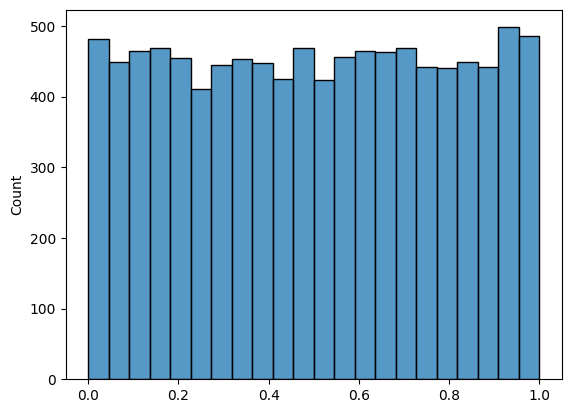

In [19]:
# Verify the probability distribution look as expected
sns.histplot(np.random.rand(10000))

<Axes: ylabel='Count'>

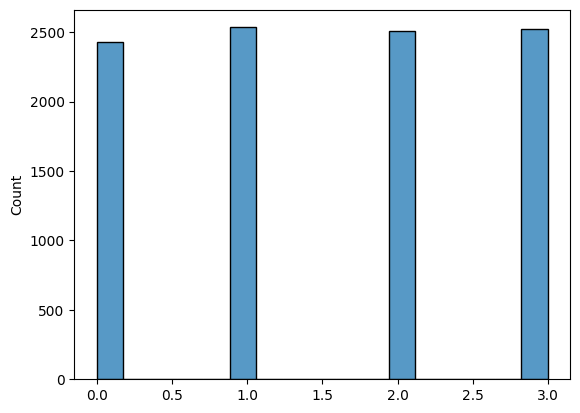

In [20]:
# Verify the probability distribution look as expected
sns.histplot(np.random.randint(0, 4,10000))

In [21]:
x0 = np.array([0, 0])
list_a = [0, 1]*30

x_trj = np.zeros((len(list_a)+1, x0.shape[0]), dtype=int)
x_trj[0] = x0
for i, a in enumerate(list_a):
    x_trj[i+1,:] = dynamics(x_trj[i,:], 0, ω_grid, n) 
# x_trj

Text(0.5, 1.0, 'Storm Influence')

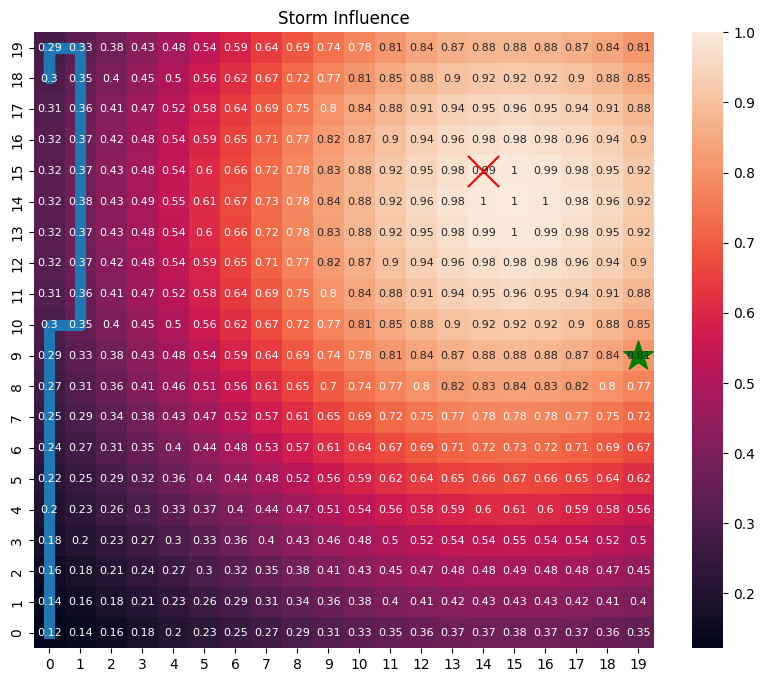

In [22]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(ω_grid, annot=True, annot_kws={'fontsize':8}, ax=ax)
ax.scatter(x_goal[0]+0.5,x_goal[1]+0.5,s=500,c='g', marker='*', label='Goal')
ax.scatter(x_eye[0]+0.5,x_eye[1]+0.5,s=500,c='r', marker='x', label='Storm Eye')
ax.plot(x_trj[:,0]+0.5, x_trj[:,1]+0.5, linewidth=8)
ax.invert_yaxis()
ax.set_title('Storm Influence')
# ax.legend()

Text(0.5, 1.0, 'Reward Function')

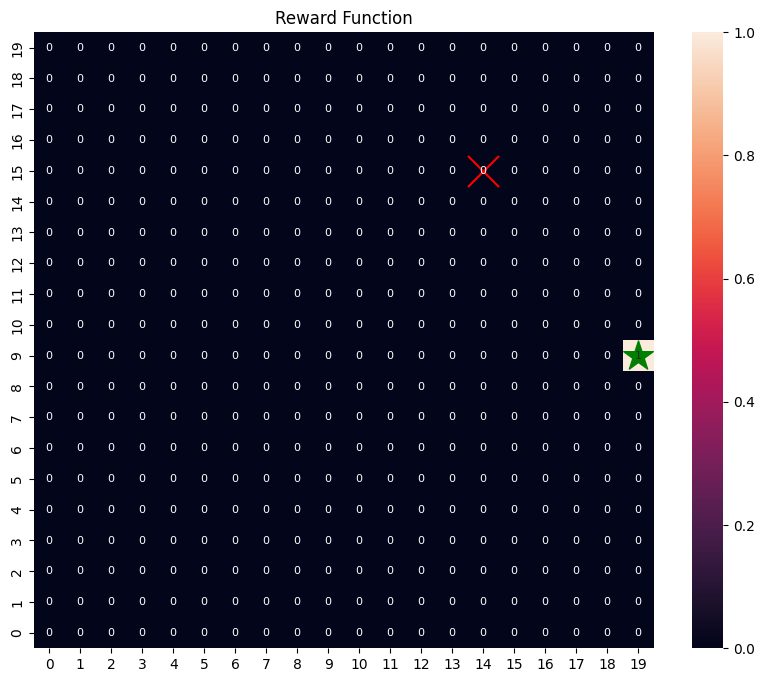

In [23]:
R_grid = np.zeros((n, n))
R_grid[*x_goal] = 1 
R_grid = R_grid.T # the indices need to be transposed because moving to the right is actually moving through columns
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(R_grid, annot=True, annot_kws={'fontsize':8}, ax=ax)
ax.scatter(x_goal[0]+0.5,x_goal[1]+0.5,s=500,c='g', marker='*', label='Goal')
ax.scatter(x_eye[0]+0.5,x_eye[1]+0.5,s=500,c='r', marker='x', label='Storm Eye')
# ax.plot(x_trj[:,0]+0.5, x_trj[:,1]+0.5, linewidth=8)
ax.invert_yaxis()
ax.set_title('Reward Function')

Text(0.5, 1.0, 'Reward Function')

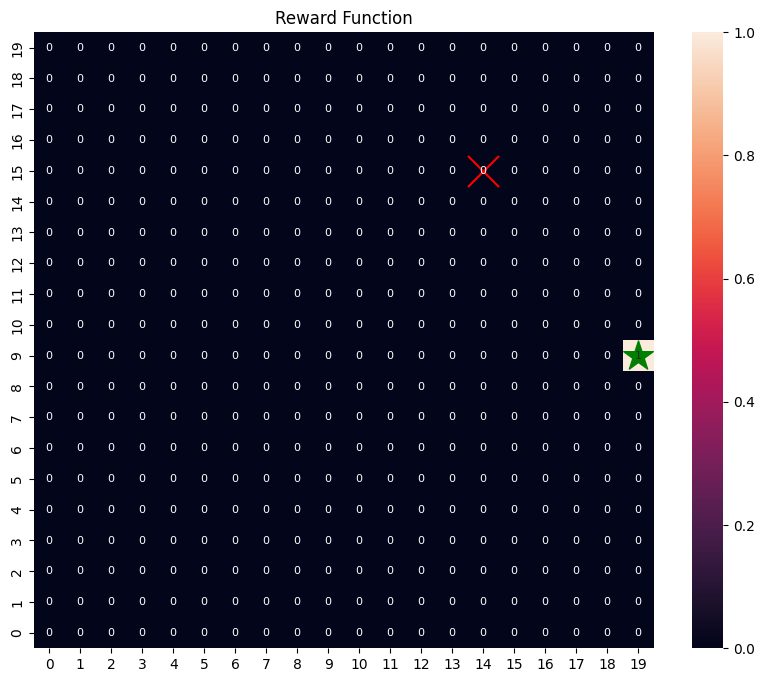

In [32]:
V_grid = np.zeros(R_grid.shape)

for i in range(V_grid.shape[0]):
    for j in range(V_grid.shape[1]):
        V_grid[i, j] = R_grid[i, j] #+ V_grid

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(V_grid, annot=True, annot_kws={'fontsize':8}, ax=ax)
ax.scatter(x_goal[0]+0.5,x_goal[1]+0.5,s=500,c='g', marker='*', label='Goal')
ax.scatter(x_eye[0]+0.5,x_eye[1]+0.5,s=500,c='r', marker='x', label='Storm Eye')
# ax.plot(x_trj[:,0]+0.5, x_trj[:,1]+0.5, linewidth=8)
ax.invert_yaxis()
ax.set_title('Reward Function')

In [ ]:
R_grid[*x_goal]

In [ ]:
R_grid